In [2]:
using JLD, LinearAlgebra, Cuba, SparseArrays, Plots, Distributed, BenchmarkTools, LaTeXStrings
# Codes for the semi-classical amplitudes
@everywhere include("/ssd/ri47hud/codes/Spectral Dimension/basic_frusta.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/laplacians_v3.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/vertex_ampl.jl"),
include("/ssd/ri47hud/codes/Spectral Dimension/return_prob_v2.jl")

In [16]:
taus = [10.0^i for i in-2:0.2:-0.4]
alpha1 = 139/192
alphas1 = [i/384 for i in 276:280] #G = 1.0, Lambda = 0.0, gamma = 1/3
alphas2 = [i for i in 0.5:0.04:0.74]
alphas3 = [i for i in 0.66:0.005:0.7]
alphas4 = [i for i in 0.684:0.002:0.7] 
alphas5 = [i for i in 0.68:0.005:0.73] #G = 10^(10), Lambda = 0.0, gamma = 1/3
alphas6 = [i for i in 0.69:0.01:0.73] #G = 10^(-8) to see if we get some alpha(G) line
alphas7 = [i for i in 0.65:0.01:0.69] #G = 10^(-4) to see ...
Gs1 = [10.0^(i) for i in -5:5]      #alpha = 0.69?
Gs2 = [10.0^(0.5*i) for i in 0:4]   #alpha = 0.69
Gs3 = [10.0^(i) for i in -1:0.25:1] #alpha = 0.69
Gs4 = [10.0^(10*i) for i in 0:4]    #alpha = 0.69
Gs5 = [10.0^(i) for i in -8:0.8:8]  #alpha = 0.69
Gs6 = [5.7*10.0^(i) for i in -1:0.5:1]  #alpha = 0.69, chosen such that for G = 57, the first zero appears at jmax
Gs7 = [3.3*10.0^(i) for i in 0:0.5:2] #alpha = 0.69, chosen such that for G = 330, the first max appears at jmax
Gs8 = [10.0^(i) for i in -20:0] #alpha = 0.69, check if we find convergence for very small G (oscillations too fast)
Gs9 = [10.0^(i) for i in -5:0.2:5] #alpha = 0.69
alphas, Gs = [139/192, 0.69], [10^(5), 1.0] #For the check data set
alphas_tot, Gs_tot = [i for i in 0.67:0.01:0.71], [10.0^(i) for i in -1:0.5:4] #One dataset that covers most of the (alpha,G) space
Lambdas1 = [10.0^(i) for i in -5:5] #alpha = 0.69, G = 1
Lambdas2 = [-10.0^(i) for i in -5:5] #alpha = 0.69, G = 1
Lambdas3 = [10.0^(i) for i in 5:15] #alpha = 0.69, G = 10^(10)
alphas_tot2, Lambdas_tot = [i for i in 0.67:0.01:0.71], [10.0^(i) for i in -2:5] #check the (alpha,Lambda)-plane, G = 1

([0.67, 0.68, 0.69, 0.7, 0.71], [0.010000000000000002, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0])

Reference spectral dimension for comparison

In [33]:
ev2_G10_a069 = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_alphas5.jld", "ev2")
specdim2_G10_a069 = [-2*(log(ev2_G10_a069[3,t+1]) - log(ev2_G10_a069[3,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:8]
ev2_G0_a069 = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_check.jld", "ev2")[2,2,:]
specdim2_G0_a069 = [-2*(log(ev2_G0_a069[t+1]) - log(ev2_G0_a069[t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:8]

8-element Vector{Float64}:
 1.1585514609230867
 1.4711125812375194
 1.7885603146639661
 1.9037001416528616
 1.802687088294813
 1.76952530261131
 2.0780289318377356
 2.7525980582201846

Study the effects of alpha on the 2-periodic spectral dimension for G = 10^10 and Lambda = 0

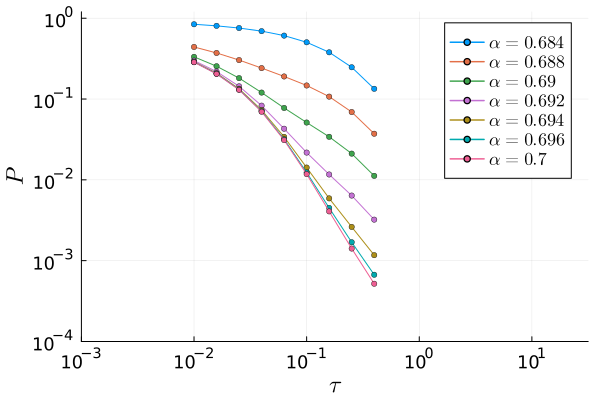

In [37]:
ev2_alphas = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_alphas4.jld", "ev2")
specdim2_alphas = [-2*(log(ev2_alphas[a,t+1]) - log(ev2_alphas[a,t]))/(log(taus[t+1]) - log(taus[t])) for a in 1:length(alphas4), t in 1:8]
fig_specdim2_alphas = plot(taus[1:8],[specdim2_alphas[a,:] for a in [1,3,4,5,6,7,9]], xaxis=:log, xlims=(10^(-3),10^1.5), ylims=(0,5), xticks=[10.0^(i) for i in -3:2], marker=:circle, xlabel=L"$\tau$", ylabel=L"$D_S$", 
label=[L"$\alpha = 0.684$" L"$\alpha = 0.688$" L"$\alpha = 0.69$" L"$\alpha = 0.692$" L"$\alpha = 0.694$" L"$\alpha = 0.696$" L"$\alpha = 0.7$"],
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
#savefig(fig_specdim2_alphas, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphas")
fig_ev2_alphas = plot(taus,[ev2_alphas[a,:] for a in [1,3,4,5,6,7,9]], xaxis=:log, yaxis=:log, 
ylims=(10^(-4),1.2), xlims=(10^(-3),10^(1.5)), xticks=[10.0^(i) for i in -3:2], marker=:circle,
xlabel=L"$\tau$", ylabel=L"$P$", label=[L"$\alpha = 0.684$" L"$\alpha = 0.688$" L"$\alpha = 0.69$" L"$\alpha = 0.692$" L"$\alpha = 0.694$" L"$\alpha = 0.696$" L"$\alpha = 0.7$"],
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
#savefig(fig_ev2_alphas, "/ssd/ri47hud/codes/Spectral Dimension/figures/ev2_alphas")

Study the effects of G for alpha = 0.69 and Lambda = 0

In [23]:
ev2_tot = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_alphaG_tot.jld", "ev2")
specdim2_tot = [[-2*(log(ev2_tot[a,g,t+1]) - log(ev2_tot[a,g,t]))/(log(taus[t+1]) - log(taus[t])) for t in 1:8] for a in 1:5, g in 1:11]
fig_specdim2_Gs = plot(taus[1:8], [specdim2_tot[3,g] for g in [2,7,11]], xaxis=:log, marker=:circle,  xlims=(10^(-3),10^1.6), xticks=[10.0^(i) for i in -3:2], ylims=(0,5), 
label=[L"$(\alpha,G) = (0.69, 10^{-0.5})$" L"$(\alpha,G) = (0.69,10^2)$" L"$(\alpha,G) = (0.69,10^4)$"],
xlabel = L"$\tau$", ylabel=L"$D_S$", legend=:bottomright, 
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
savefig(fig_specdim2_Gs, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphafix_Gvary")

"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphafix_Gvary.png"

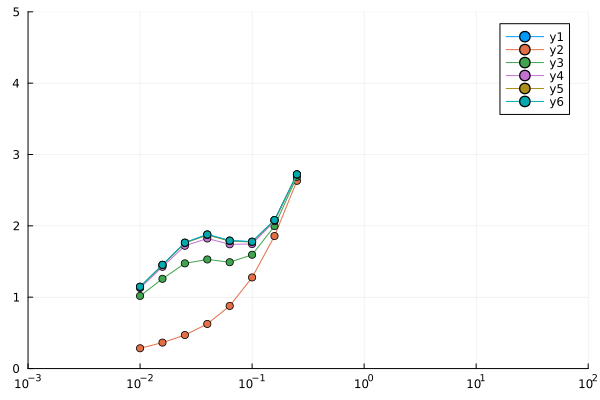

In [209]:
ev2_Gs = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_Gs5.jld", "ev2")
specdim2_Gs5 = [-2*(log(ev2_Gs[G,t+1]) - log(ev2_Gs[G,t]))/(log(taus[t+1]) - log(taus[t])) for G in 1:length(Gs5), t in 1:8]
fig_specdim2_Gs = plot(taus[1:8], vcat([specdim2_G10_a069], [specdim2_Gs[g,:] for g in [16,17,18,19]]), xaxis=:log, xlims=(10^(-3),10^2), ylims=(0,5), marker=:circle)
#savefig(fig_specdim2_Gs, "/home/jercheal/Documents/Physics/Codes/Spectral Dimension/plots/specdim2_Gs")
#fig_ev2_Gs = plot(taus,[ev2_Gs[a,:] for a in [1,3,4,5,6,9]], xaxis=:log, yaxis=:log, 
#ylims=(10^(-4),1.2), xlims=(10^(-3),10^(2)), marker=:circle,
#xlabel=L"$\tau$", ylabel=L"$P$", label=[L"$\alpha = 0.684$" L"$\alpha = 0.688$" L"$\alpha = 0.689$" L"$\alpha = 0.692$" L"$\alpha = 0.694$" L"$\alpha = 0.7$"])
#savefig(fig_ev2_Gs, "/home/jercheal/Documents/Physics/Codes/Spectral Dimension/plots/ev2_Gs")

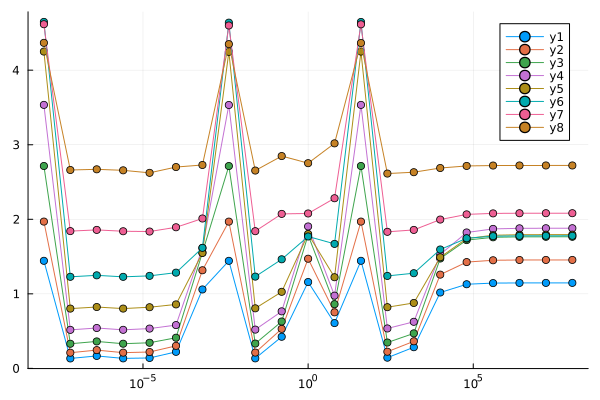

In [126]:
converg5 = [[specdim2_Gs5[g,t] for g in 1:length(Gs5)] for t in 1:8]
plot(Gs5, [converg[t] for t in 1:8], xaxis=:log, marker=:circle)

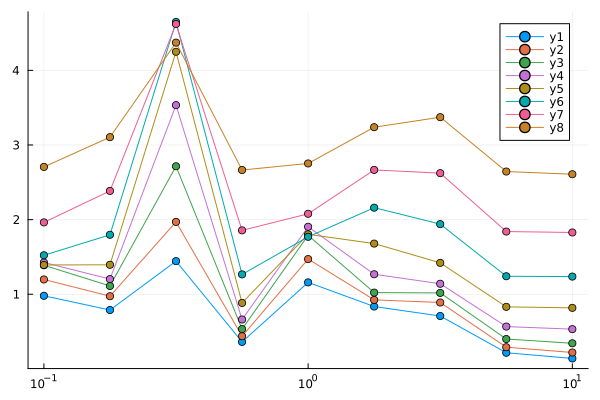

In [128]:
ev2_Gs = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_Gs3.jld", "ev2")
specdim2_Gs3 = [-2*(log(ev2_Gs[G,t+1]) - log(ev2_Gs[G,t]))/(log(taus[t+1]) - log(taus[t])) for G in 1:length(Gs3), t in 1:8]
converg3 = [[specdim2_Gs3[g,t] for g in 1:length(Gs3)] for t in 1:8]
plot(Gs3, [converg3[t] for t in 1:8], xaxis=:log, marker=:circle)

Check if there's a non-trivial critical line in the (alpha, G)-space.

In [28]:
fig_specdim2_alphavary1 = plot(taus[1:8], [specdim2_tot[a,2] for a in 1:3], xaxis=:log, marker=:circle, xlims=(10^(-3),10^1.6), xticks=[10.0^(i) for i in -3:2],
ylims=(0,5), 
label=[L"(\alpha,G) = (0.67, 10^{-0.5})" L"(\alpha,G) = (0.68, 10^{-0.5})" L"(\alpha,G) = (0.69, 10^{-0.5})"],
xlabel=L"$\tau$", ylabel=L"$D_S$", legend=:bottomright, 
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
savefig(fig_specdim2_alphavary1, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphavary1")

"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphavary1.png"

In [29]:
fig_specdim2_alphavary2 = plot(taus[1:8], [specdim2_tot[a,7] for a in 3:5], xaxis=:log, marker=:circle, xlims=(10^(-3),10^1.6), xticks=[10.0^(i) for i in -3:2],
ylims=(0,5),
label=[L"(\alpha,G) = (0.69, 10^{2})" L"(\alpha,G) = (0.70, 10^{2})" L"(\alpha,G) = (0.71, 10^{2})"],
xlabel=L"$\tau$", ylabel=L"$D_S$", legend=:bottomright, 
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
savefig(fig_specdim2_alphavary2, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphavary2")

"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_alphavary2.png"

Study the effects of a cosmological constant

In [38]:
ev2_Lambdas1 = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_Lambdas1.jld", "ev2")
specdim2_Lambdas1 = [[-2*(log(10, ev2_Lambdas1[L,t+1]) - log(10, ev2_Lambdas1[L,t]))/(log(10, taus[t+1]) - log(10, taus[t])) for t in 1:8] for L in 1:11]
ev2_Lambdas2 = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_Lambdas2.jld", "ev2")
specdim2_Lambdas2 = [[-2*(log(10, ev2_Lambdas2[L,t+1]) - log(10, ev2_Lambdas2[L,t]))/(log(10, taus[t+1]) - log(10, taus[t])) for t in 1:8] for L in 1:11]
ev2_Lambdas3 = load("/ssd/ri47hud/codes/Spectral Dimension/ev2/ev2_EPRL_1_402_g13_Lambdas3.jld", "ev2")
specdim2_Lambdas3 = [[-2*(log(10, ev2_Lambdas3[L,t+1]) - log(10, ev2_Lambdas3[L,t]))/(log(10, taus[t+1]) - log(10, taus[t])) for t in 1:8] for L in 1:11]
#plot(taus[1:8], [specdim2_Lambdas3[L] for L in [1,10,11]], xaxis=:log,  xlims=(10^(-3),10^2), ylims=(0,5), marker=:circle)
fig_specdim2_Lambdas1 = plot(taus[1:8], [specdim2_G0_a069, specdim2_Lambdas1[3], specdim2_Lambdas1[4], specdim2_Lambdas1[5], specdim2_Lambdas1[6]], xaxis=:log, xlims=(10^(-3),10^1.5), ylims=(0,5), xticks=[10.0^(i) for i in -3:2], marker=:circle,
xlabel=L"$\tau$", ylabel=L"$D_S$", label=[L"$\Lambda =  0$" L"$\Lambda =  10^{-3}$" L"$\Lambda =  10^{-2}$" L"$\Lambda =  10^{-1}$" L"$\Lambda =  10^{0}$"],
markersize=:3.0, markerstrokewidth=:0.5, xtickfontsize=12, ytickfontsize=12, labelfontsize=16, legendfontsize=12)
savefig(fig_specdim2_Lambdas1, "/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_Lambdas1")


"/ssd/ri47hud/codes/Spectral Dimension/figures/specdim2_Lambdas1.png"

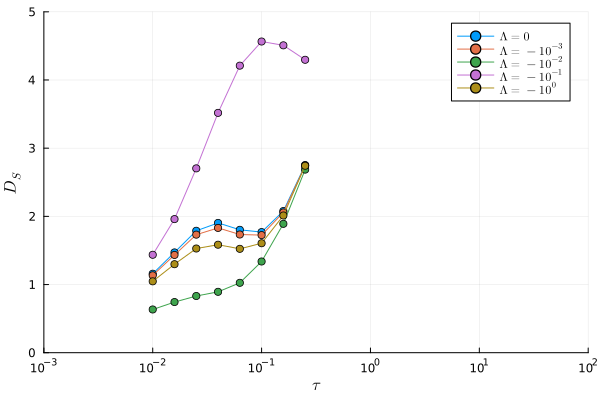

In [196]:
fig_specdim2_Lambdas2 = plot(taus[1:8], [specdim2_G0_a069, specdim2_Lambdas2[3], specdim2_Lambdas2[4], specdim2_Lambdas2[5], specdim2_Lambdas2[6]], xaxis=:log,  xlims=(10^(-3),10^2), ylims=(0,5), marker=:circle,
xlabel=L"$\tau$", ylabel=L"$D_S$", label=[L"$\Lambda =  0$" L"$\Lambda =  -10^{-3}$" L"$\Lambda =  -10^{-2}$" L"$\Lambda =  -10^{-1}$" L"$\Lambda = - 10^{0}$"])

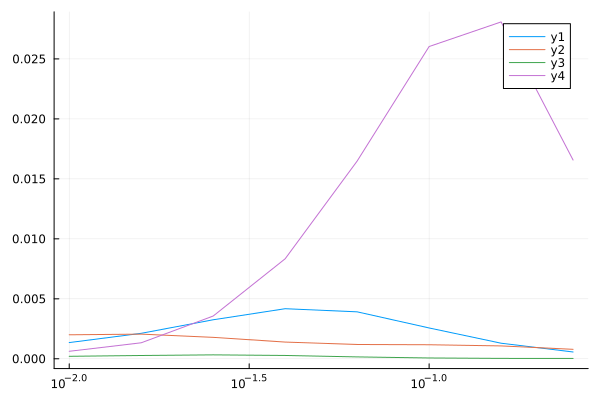

In [192]:
relerr = [abs(specdim2_Lambdas1[L][t]-specdim2_Lambdas2[L][t]) for t in 1:8, L in 1:11]
plot(taus[1:8], [relerr[:,L] for L in 3:6], xaxis=:log)

What is the phase shift for the vertex amplitude and what's the value of the Regge-action for spins (1,2,1,1)?

In [276]:
println(angle(D(1.0,2.0,1.0)), "  ", SRegge(1.0, 2.0, 1.0))

2.6148443122860616  -0.7663506844954435


Behavior of a single dressed vertex amplitude for scaling with curvature present.

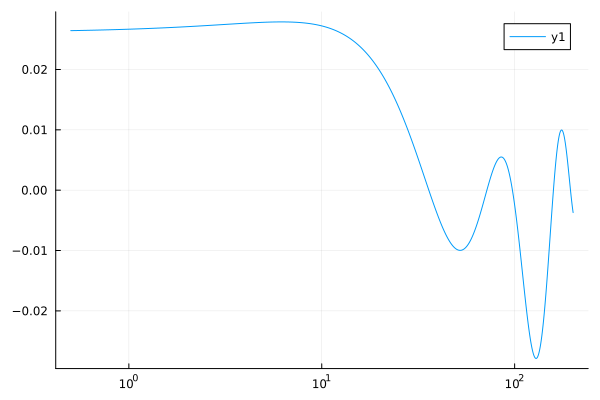

In [87]:
alpha   = 0.5
G       = 10.0^(1)
gamma   = 1/3
Lambda  = 0.0
spins = [0.5*j for j in 1:0.01:402]
Vamp = [(j)^(3) * Ampl_cont(alpha, G, gamma, Lambda, j, 2*j, j) for j in spins]
plot(spins, Vamp, xaxis=:log)

In [437]:
[findall(x -> isapprox(x, 3*10.0^(0.5*i), rtol=0.0003), spins) for i in 0:4] 

5-element Vector{Vector{Int64}}:
 [501]
 [1798]
 [5900, 5901, 5902]
 [18869, 18870, 18871, 18872, 18873, 18874, 18875, 18876, 18877, 18878, 18879, 18880]
 []

What happens to the full amplitude, i.e. to Am16?

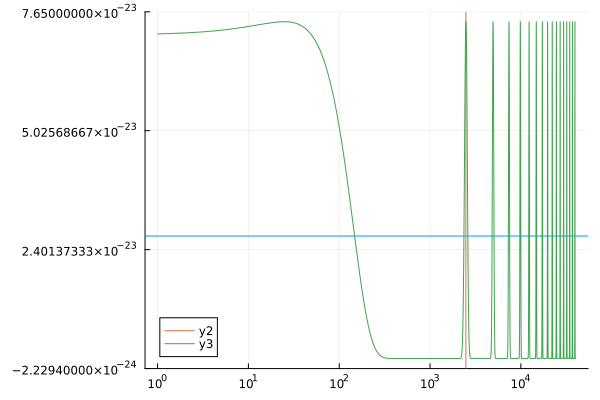

In [105]:
alpha   = 0.69
G       = 10.0^(0)
gamma   = 1/3
Lambda  = 0.0
spinrange = [501, 1798, 5901, 18875, 40101]
Vamp16      = [[Am16_cont(alpha, 10.0^(0.5*i), gamma, Lambda, j, 2*j, j,j) for j in spins] for i in 0:4]
Vamp16_resc = [[j^(-16*(12*alpha-9)) * Am16_cont(alpha, 10.0^(0.5*i), gamma, Lambda, j, 2*j, j,j) for j in spins] for i in 0:4]
hline([2.70189704388049e-23],label=false)
vline!([2480])
plot!([Vamp16_resc[n] for n in [1]], legend=:bottomleft, xaxis=:log, ylims=(-2.2294*10.0^(-24),7.65*10.0^(-23)))

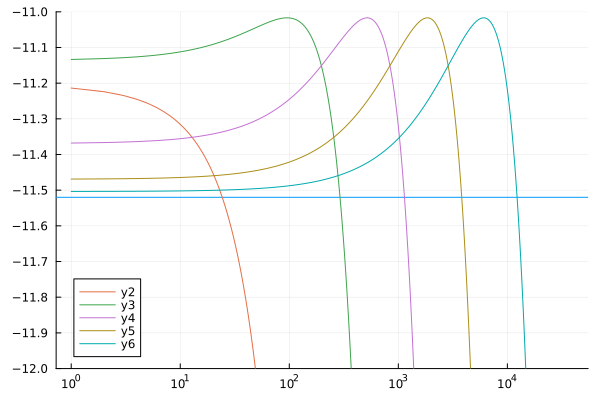

In [50]:
scaling16 = [[(log(Vamp16[G][i+1]) - log(Vamp16[G][i]))/(log(spins[i+1]) - log(spins[i])) for i in 1:(length(spins)-1)] for G in 1:5]
hline([-11.52], label=false)
plot!([scaling16[n][1:(spinrange[n]-1)] for n in 1:5], xaxis=:log, ylims=(-12,-11), yticks=-12:0.1:-11,legend=:bottomleft)


I am highly confused with the results. Could the issue be the fact that we consider discrete spins, governed by the EPRL-condition?

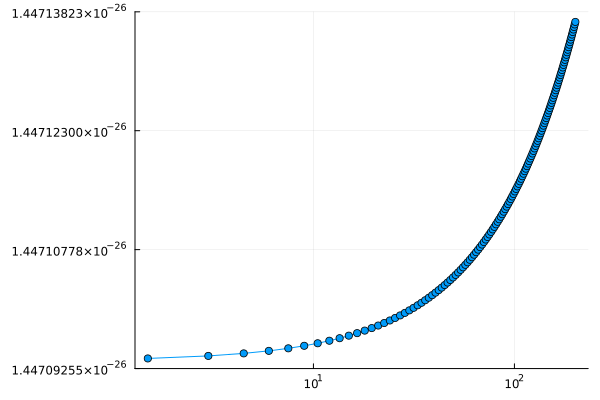

In [224]:
spins = [0.5*i for i in 1:402 if EPRL_cond(0.5*i, 1//3) == 1]
Am16_disc_resc = [[j^((9-12*0.69)*16) * Am16(0.69, 10.0^(i), 1/3, 0.0, j, 4*j, 2*j, 2*j) for j in spins] for i in 0:30]
Am1_Lambda = [[j^((9-12*0.69)) * Ampl(0.69, 10.0^(i), 1/3, 1.0, j,j,j) for j in spins] for i in 0:30]
#scaling16_disc = [[(log(Am16_disc_resc[G][n+1]) - log(Am16_disc_resc[G][n]))/(log(spins[n+1]) - log(spins[n])) for n in 1:(length(spins)-1)] for G in 1:5]
plot(spins[1:(length(spins))], [Am16_disc_resc[n] for n in [9]] ,marker=:circle, legend=false, xaxis=:log)

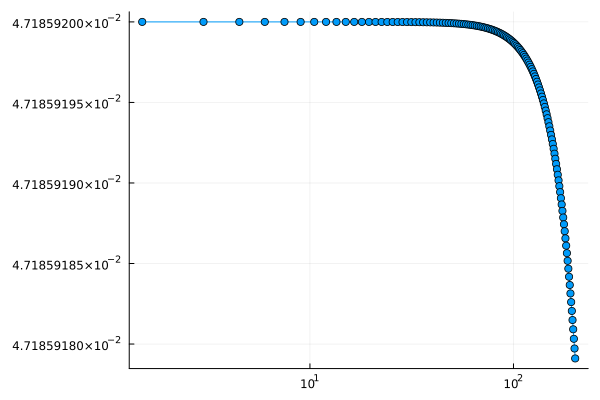

In [194]:
plot(spins[1:(length(spins))], [Am1_Lambda[n] for n in [9]] ,marker=:circle, legend=false, xaxis=:log)

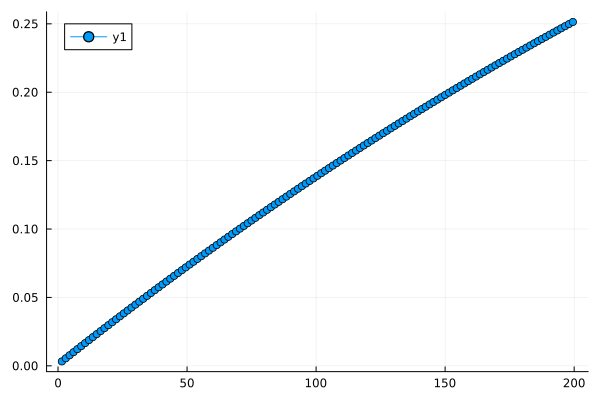

In [225]:
scaling16_disc = [[(log(Am16_disc_resc[g][n+1]) - log(Am16_disc_resc[g][n]))/(log(spins[n+1]) - log(spins[n])) for n in 1:(length(spins)-1)] for g in 1:31]
plot(spins[1:(length(spins)-1)], [scaling16_disc[n] for n in [5]], marker=:circle)

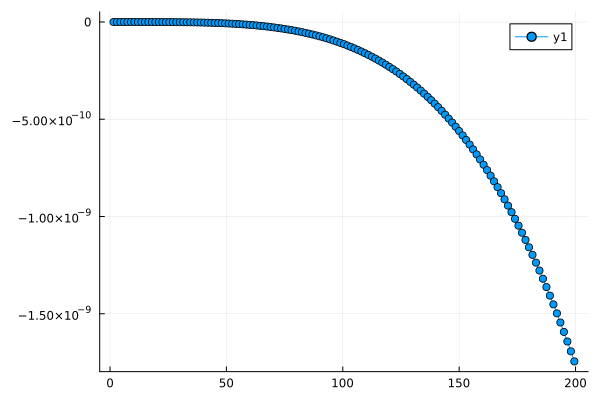

In [231]:
scaling1_Lambda = [[(log(abs(Am1_Lambda[g][n+1])) - log(abs(Am1_Lambda[g][n])))/(log(spins[n+1]) - log(spins[n])) for n in 1:(length(spins)-1)] for g in 1:31]
plot(spins[1:(length(spins)-1)], [scaling1_Lambda[n] for n in [10]], marker=:circle)

Check, if the weird behavior originates from the wrong Laplacian: It does not come from that as I checked.

Check again, if there's a mistake somewhere. alpha = 139/192, 0.69 and G = [10^5, 1]. Let's see

In [230]:
1e40

1.0e40